# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# import numpy and pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Challenge 1 - Exploring the Data

In this challenge, we will examine all salaries of employees of the City of Chicago. We will start by loading the dataset and examining its contents. Please, load the data using Ironhack's database (db: employees, table: employees_advanced).

In [2]:
# Your code here:
df=pd.read_csv('Current_Employee_Names__Salaries__and_Position_Titles.csv')

Examine the `salaries` dataset using the `head` function below.

In [3]:
# Your code here:
df.head()


,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,101592.0,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,110064.0,NaN
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86


We see from looking at the `head` function that there is quite a bit of missing data. Let's examine how much missing data is in each column. Produce this output in the cell below

In [4]:
# Your code here:
df.isna().sum()


Name                     0
Job Titles               0
Department               0
Full or Part-Time        0
Salary or Hourly         0
Typical Hours        25161
Annual Salary         8022
Hourly Rate          25161
dtype: int64

Let's also look at the count of hourly vs. salaried employees. Write the code in the cell below

In [5]:
# Your code here:
df['Salary or Hourly'].value_counts()

Salary    25161
Hourly     8022
Name: Salary or Hourly, dtype: int64

What this information indicates is that the table contains information about two types of employees - salaried and hourly. Some columns apply only to one type of employee while other columns only apply to another kind. This is why there are so many missing values. Therefore, we will not do anything to handle the missing values.

There are different departments in the city. List all departments and the count of employees in each department.

In [6]:
# Your code here:
df.groupby('Department').agg({'Salary or Hourly':'count'})


,Salary or Hourly
Department,
ADMIN HEARNG,39
ANIMAL CONTRL,81
AVIATION,1629
BOARD OF ELECTION,107
BOARD OF ETHICS,8
BUDGET & MGMT,46
BUILDINGS,269
BUSINESS AFFAIRS,171
CITY CLERK,84


# Challenge 2 - Hypothesis Tests

In this section of the lab, we will test whether the hourly wage of all hourly workers is significantly different from $30/hr. Import the correct one sample test function from scipy and perform the hypothesis test for a 95% two sided confidence interval.

In [7]:
# Your code here:
from scipy.stats import ttest_1samp
# H0: mean hourly wage =30
# H1: !=30
houry_rate=df['Hourly Rate'][df['Annual Salary'].isna()]
result=ttest_1samp(houry_rate,30)
print('T stat:',round(result[0],2),'\nP-value',round(result[1],2))
print('Rejected!') if result[1]<0.05 else print("Can't be rejected") #if the p value is under 0.05 it means that it is very likely that the hypothesis is not correct

T stat: 20.62 
P-value 0.0
Rejected!


We are also curious about salaries in the police force. The chief of police in Chicago claimed in a press briefing that salaries this year are higher than last year's mean of $86000/year a year for all salaried employees. Test this one sided hypothesis using a 95% confidence interval.

Hint: A one tailed test has a p-value that is half of the two tailed p-value. If our hypothesis is greater than, then to reject, the test statistic must also be positive.

mean of sample is : 86486.41450313339
T stat: 3.08 
P-value 0.0
Rejected!


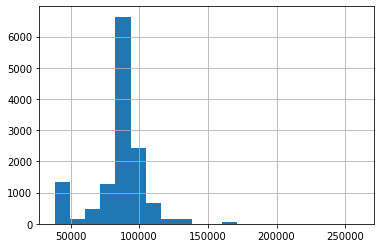

In [8]:
# Your code here:
alpha=0.05
Police_Salary=df['Annual Salary'][(df['Hourly Rate'].isna()) & (df['Department']=='POLICE')]
result=ttest_1samp(Police_Salary,86000)
print('mean of sample is :',Police_Salary.mean())
print('T stat:',round(result[0],2),'\nP-value',round(result[1],2))
print('Rejected!') if result[1]<alpha else print("Can't be rejected")
Police_Salary.hist(bins=20);
# H0: mu = 86 000
# H1: mu != 86 000

Using the `crosstab` function, find the department that has the most hourly workers. 

In [9]:
# Your code here:

stat, p=ttest_1samp(Police_Salary,86000)
p_one_side_test=p/2
if p_one_side_test<0.05 and stat>0:
    print('H0 Rejected')
    print('The mean salary of police officers increased in comparison to the last year')
else :
    print('H0 can\'t be rejected')

H0 Rejected
The mean salary of police officers increased in comparison to the last year


The workers from the department with the most hourly workers have complained that their hourly wage is less than $35/hour. Using a one sample t-test, test this one-sided hypothesis at the 95% confidence level.

In [10]:
# Your code here:

pd.crosstab(df.Department,df["Salary or Hourly"]).sort_values(by="Hourly")

Salary or Hourly,Hourly,Salary
Department,,
ADMIN HEARNG,0,39
POLICE BOARD,0,2
BOARD OF ELECTION,0,107
BOARD OF ETHICS,0,8
LICENSE APPL COMM,0,1
BUILDINGS,0,269
INSPECTOR GEN,0,87
CITY CLERK,0,84
HUMAN RELATIONS,0,16


mean of sample is 33.728378088076845
H0 rejected
Actually they are right


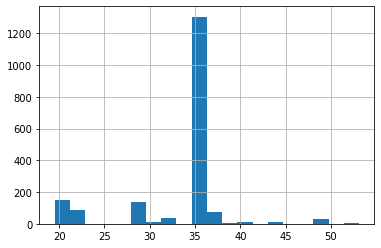

In [14]:
alpha=0.05
gilet_jaune=df.loc[(df['Salary or Hourly']=='Hourly')&(df.Department=='STREETS & SAN'),'Hourly Rate']
print('mean of sample is',gilet_jaune.mean())
gilet_jaune.hist(bins=20);

stat,p=ttest_1samp(gilet_jaune,35)
p_one_side_test=p/2

if p_one_side_test<0.05 and stat<0:
    print('H0 rejected\nActually they are right')
elif p_one_side_test<0.05 and stat>0:
    print("H0 Rejected,\njust wanted to complain")
else:
    print('H0 can\'t be rejected,\nNo idea what is going on')

# Challenge 3: To practice - Constructing Confidence Intervals

While testing our hypothesis is a great way to gather empirical evidence for accepting or rejecting the hypothesis, another way to gather evidence is by creating a confidence interval. A confidence interval gives us information about the true mean of the population. So for a 95% confidence interval, we are 95% sure that the mean of the population is within the confidence interval. 
).

To read more about confidence intervals, click [here](https://en.wikipedia.org/wiki/Confidence_interval).


In the cell below, we will construct a 95% confidence interval for the mean hourly wage of all hourly workers. 

The confidence interval is computed in SciPy using the `t.interval` function. You can read more about this function [here](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html).

To compute the confidence interval of the hourly wage, use the 0.95 for the confidence level, number of rows - 1 for degrees of freedom, the mean of the sample for the location parameter and the standard error for the scale. The standard error can be computed using [this](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html) function in SciPy.

In [66]:
# Your code here:
from scipy import stats
from scipy.stats import norm
Hourly=df['Hourly Rate'][df['Salary or Hourly']=='Hourly']
mean=np.mean(Hourly)
std=(np.var(Hourly)*len(Hourly)/len(Hourly))**0.5               #s=sqrt(var(x)*n/(n-1))
std=Hourly.std()
se=std/(len(Hourly)**0.5) 

interval2=stats.norm.interval(0.95, loc= mean,scale=se)
interval2

(32.52349834813896, 33.05361708442361)

In [61]:
tscore=stats.t.interval(0.95,len(Hourly)-1)[1]                  
[mean-tscore*se,mean+tscore*se]

[32.52347486867093, 33.053640563889545]

Now construct the 95% confidence interval for all salaried employeed in the police in the cell below.

In [83]:
# Your code here:

Salary=df['Annual Salary'][(df['Department']== 'POLICE')&(df['Salary or Hourly']=='Salary')]
mean=np.mean(Salary)
deg_free=len(Salary)-1
std=Salary.std()
se=std/(len(Salary)**0.5) 

tscore=stats.t.interval(0.95,deg_free)[1]                  
[mean-tscore*se,mean+tscore*se]

[86177.05631531785, 86795.77269094893]

In [84]:
import scipy.stats as scs
from scipy.stats import t,sem

Salary=df['Annual Salary'][(df['Department']== 'POLICE')&(df['Salary or Hourly']=='Salary')]
mean=Salary.mean()
deg_free=len(Salary)-1
sm=sem(Salary)

t.interval(0.95,df=deg_free,loc=mean,scale=sm)                 

(86177.05631531784, 86795.77269094894)

# Bonus Challenge - Hypothesis Tests of Proportions

Another type of one sample test is a hypothesis test of proportions. In this test, we examine whether the proportion of a group in our sample is significantly different than a fraction. 

You can read more about one sample proportion tests [here](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/SAS/SAS6-CategoricalData/SAS6-CategoricalData2.html).

In the cell below, use the `proportions_ztest` function from `statsmodels` to perform a hypothesis test that will determine whether the number of hourly workers in the City of Chicago is significantly different from 25% at the 95% confidence level.

In [13]:
# Your code here:

